In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Job seekers during Covid-19
## Group 22

<img src="https://github.com/LirazShushan/Job-Seekers-Covid-19/blob/main/NeedAJob.jpeg?raw=true" alt="Need A Job" width="500" />

Liraz Shushsan\
Adi Kachlon\
Meitav Mazuz\
Eliya Riar

Links:\
Data 2020: https://www.taasuka.gov.il/he/InfoAndPublications/pages/jobseekersdata.aspx \
Data 2023: https://data.gov.il/dataset/jobseekersdata/resource/3739f4af-9e4b-4502-a904-c7bc14ffa7db

In [4]:
url = 'https://raw.githubusercontent.com/LirazShushan/Job-Seekers-Covid-19/main/datajobseekers.csv'
job_df = pd.read_csv(url)

In [5]:
job_df.head(5)

,Month,District,Age group,Gender,Education,Disability,Religion,\nAnnual unemployment days,Occupations until February 2015\n,Occupations until April 2015\n,Jobseekers,Hh,Academic unemployment,Non academic unemployment,Newcomers,Newcomers that got fired
0,2020-01,"מחוז ש""ת דן",בני 17 ומטה,זכר,א. לא למד,א. ללא מגבלות,יהודים,א. עד 30 יום,NaN,עובדים בלתי מקצועיים,2,0,0,2,0,0
1,2020-01,"מחוז ש""ת דן",בני 17 ומטה,זכר,א. לא למד,א. ללא מגבלות,מוסלמים,ד. מעל 270 יום,NaN,עובדי מכירות ושירותים,1,0,0,1,0,0
2,2020-01,"מחוז ש""ת דן",בני 17 ומטה,נקבה,א. לא למד,א. ללא מגבלות,אחר,ד. מעל 270 יום,NaN,לא הוגדר,1,0,0,1,0,0
3,2020-01,"מחוז ש""ת דן",בני 18 עד 24,זכר,א. לא למד,א. ללא מגבלות,יהודים,א. עד 30 יום,NaN,בעלי מלאכה בתעשייה ובבינוי ובעלי משלח יד דומה,1,0,0,1,0,0
4,2020-01,"מחוז ש""ת דן",בני 18 עד 24,זכר,א. לא למד,א. ללא מגבלות,יהודים,א. עד 30 יום,NaN,בעלי משלח יד אקדמי,1,0,0,1,0,0


## Translation to English

In [3]:
job_df.columns = job_df.columns.str.replace('\n', '')
job_df = job_df.drop(['Newcomers that got fired','Occupations until February 2015'], axis=1)
job_df['Month'] = job_df['Month'].str.replace('2020-0', '')
job_df.dtypes

Month                           object
District                        object
Age group                       object
Gender                          object
Education                       object
Disability                      object
Religion                        object
Annual unemployment days        object
Occupations until April 2015    object
Jobseekers                       int64
Hh                               int64
Academic unemployment            int64
Non academic unemployment        int64
Newcomers                        int64
dtype: object

In [4]:
job_df['Month'] = job_df['Month'].astype(int)
month_mapping = {1: 'January20',2: 'February20',3: 'March20',4: 'April20',5: 'May',6: 'June',7: 'July',8: 'August',9: 'September',10: 'October',11: 'November',12: 'December'}
education_mapping = {'ג. 10 עד 12': 'High school (10-12)','א. לא למד': 'No education','ד. מעל 12': 'More than 12 years','ב. 1 עד 9': 'Elementary school (1-9)'}
disability_mapping = {'א. ללא מגבלות': 'No disabilities','ג. בינונית': 'Moderate','ב. קלה': 'Mild','ד. קשה': 'Severe'}
religion_mapping = {'יהודים': 'Jewish','מוסלמים': 'Muslim','אחר': 'Other','נוצרים': 'Christian','דרוזים': 'Druze'}
gender_mapping = {'זכר':'male','נקבה':'female'}
unemployment_mapping = {'ד. מעל 270 יום': 'More than 270 days', 'א. עד 30 יום': 'Up to 30 days', 'ב. בין 31 ל-180 יום': 'Between 31 and 180 days', 'ג. בין 181 ל-270 יום': 'Between 181 and 270 days'}
occupation_mapping = {'לא הוגדר': 'Undefined','עובדי מכירות ושירותים': 'Sales and service workers','בעלי משלח יד אקדמי': 'Academic professionals','עובדים בלתי מקצועיים': 'Unskilled workers','הנדסאים, טכנאים, סוכנים ובעלי משלח יד נלווה': 'Engineers, technicians, agents, and related support professionals','מנהלים': 'Managers','בעלי מלאכה בתעשייה ובבינוי ובעלי משלח יד דומה': 'Craft and related trades workers in industry and construction','פקידים כלליים ועובדי משרד': 'General office clerks and office workers','מפעילי מתקנים ומכונות, מרכיבי מוצרים וציוד ונהגים': 'Plant and machine operators, assemblers, drivers','עובדים מקצועיים בחקלאות, בייעור ובדיג': 'Skilled agricultural, forestry, and fishery workers'}
age_mapping = {'בני 45 עד 54': 'age: 45-54','בני 55 עד 64': 'age: 55-64','בני 65 ומעלה': 'age: 65+','בני 17 ומטה': ' age: 0-17','בני 18 עד 24': 'age: 18-24','בני 25 עד 34': 'age: 25-34','בני 35 עד 44': 'age: 35-44','לא ידוע': 'unknown'}
district_mapping = {'מחוז ש"ת דן': 'Dan District','מחוז ש"ת צפון': 'Northern District','מחוז ש"ת ירושלים': 'Jerusalem District','מחוז ש"ת דרום': 'Southern District','מחוז ש"ת שרון ועמקים': 'Sharon and Coastal Plain District'}
job_df['District'] = job_df['District'].map(district_mapping)
job_df['Age group'] = job_df['Age group'].map(age_mapping)
job_df['Gender'] = job_df['Gender'].map(gender_mapping)
job_df['Occupations until April 2015'].value_counts()
job_df['Month'] = job_df['Month'].map(month_mapping)
job_df['Education'] = job_df['Education'].map(education_mapping)
job_df['Disability'] = job_df['Disability'].map(disability_mapping)
job_df['Religion'] = job_df['Religion'].map(religion_mapping)
job_df['Annual unemployment days'] = job_df['Annual unemployment days'].map(unemployment_mapping)
job_df['Occupations until April 2015'] = job_df['Occupations until April 2015'].map(occupation_mapping)

The data according to job seekers column

In [5]:
new_df = pd.DataFrame(job_df.values.repeat(job_df.Jobseekers, axis=0), columns=job_df.columns)

The data according to new comers column

In [6]:
newcomers_df = pd.DataFrame(job_df.values.repeat(job_df.Newcomers, axis=0), columns=job_df.columns)

## Figuring the data

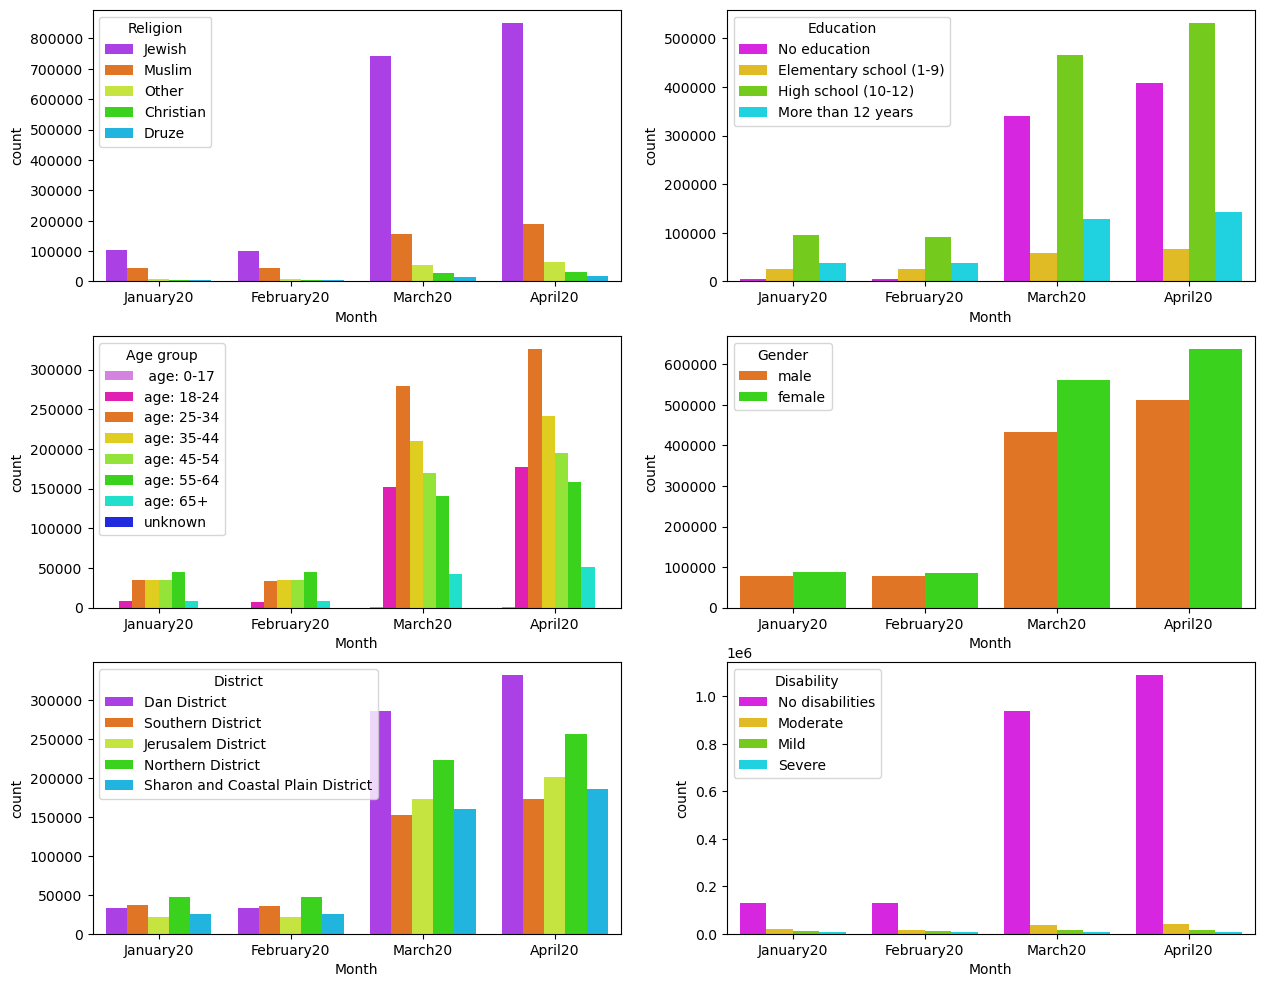

In [7]:
fig, axes = plt.subplots(3,2,figsize=(15,12))
sns.countplot(data = new_df, x = 'Month', ax = axes[0,0], hue = 'Religion', palette = 'gist_ncar_r')
sns.countplot(data = new_df, x = 'Month', ax = axes[0,1], hue = 'Education', palette = 'gist_ncar_r')
sns.countplot(data = new_df, x = 'Month', ax = axes[1,0], hue = 'Age group' ,palette = 'gist_ncar_r')
sns.countplot(data = new_df, x = 'Month', ax = axes[1,1], hue = 'Gender' ,palette = 'gist_ncar_r')
sns.countplot(data = new_df, x = 'Month', ax = axes[2,0], hue = 'District' ,palette = 'gist_ncar_r')
sns.countplot(data = new_df, x = 'Month', ax = axes[2,1], hue = 'Disability' ,palette = 'gist_ncar_r')
plt.show()

From the last gragh we can see that people with disabilities were not affected by the increased unemployment rates, and this is because they are mostly in special hostels and work in jobs that are subsidized by the state.

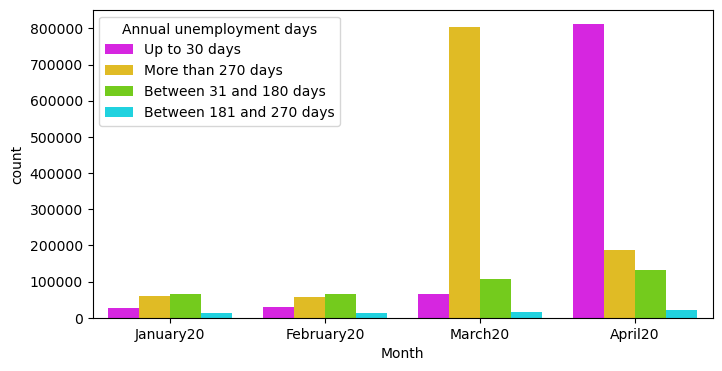

In [8]:
plt.figure(figsize=(8,4))
sns.countplot(data = new_df, x = 'Month', hue = 'Annual unemployment days' ,palette = 'gist_ncar_r')
plt.show()

As can be seen, there is a sharp increase in March in the number of people reporting that they have been unemployed for over 270 days. We expected to see significant growth in new unemployment cases, meaning those reporting they have been unemployed for up to 30 days. After checking against general unemployment data during COVID-19, we realized that there is an error in the data.


## Correcting the wrong Annual unemployment days

In [9]:
job_df['Newcomers'] = job_df['Newcomers'].astype(int)
job_df.nlargest(5, 'Newcomers')

,Month,District,Age group,Gender,Education,Disability,Religion,Annual unemployment days,Occupations until April 2015,Jobseekers,Hh,Academic unemployment,Non academic unemployment,Newcomers
57588,March20,Jerusalem District,age: 18-24,female,No education,No disabilities,Jewish,More than 270 days,Undefined,9665,92,0,9573,9233
45722,March20,Dan District,age: 18-24,female,No education,No disabilities,Jewish,More than 270 days,Undefined,9575,115,0,9460,9197
46456,March20,Dan District,age: 25-34,female,No education,No disabilities,Jewish,More than 270 days,Undefined,7257,70,0,7187,6919
45977,March20,Dan District,age: 25-34,male,No education,No disabilities,Jewish,More than 270 days,Undefined,6089,61,0,6028,5737
58269,March20,Jerusalem District,age: 25-34,female,No education,No disabilities,Jewish,More than 270 days,Undefined,5906,51,1,5854,5639


We can see that there are 20 rows with high values of "more than 270 days" of unemployment under "Newcomers". This makes no sense. 

In [10]:
job_df.loc[job_df['Month'] == 'March20', 'Annual unemployment days'] = job_df.loc[job_df['Month'] == 'March20', 'Annual unemployment days'].replace('Up to 30 days', 'N')
job_df.loc[job_df['Month'] == 'March20', 'Annual unemployment days'] = job_df.loc[job_df['Month'] == 'March20', 'Annual unemployment days'].replace('More than 270 days', 'Up to 30 days')
job_df.loc[job_df['Month'] == 'March20', 'Annual unemployment days'] = job_df.loc[job_df['Month'] == 'March20', 'Annual unemployment days'].replace('N', 'More than 270 days')

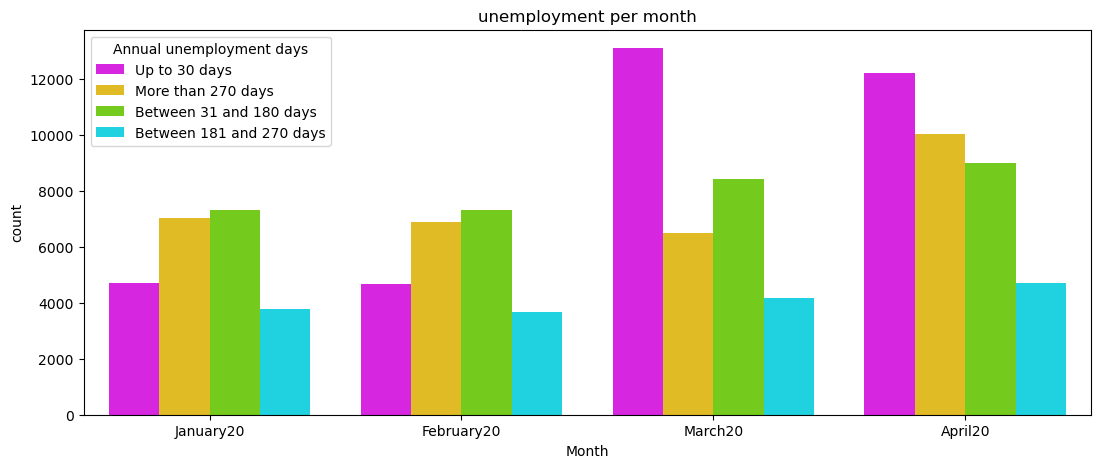

In [11]:
plt.subplots(figsize = (13,5))
sns.countplot(data=job_df, x="Month", hue='Annual unemployment days', palette = 'gist_ncar_r')
plt.title("unemployment per month")
plt.show()

## Checking according to new seekers

In [12]:
newcomers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987033 entries, 0 to 987032
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Month                         987033 non-null  object
 1   District                      987033 non-null  object
 2   Age group                     987033 non-null  object
 3   Gender                        987033 non-null  object
 4   Education                     987033 non-null  object
 5   Disability                    987033 non-null  object
 6   Religion                      987033 non-null  object
 7   Annual unemployment days      987033 non-null  object
 8   Occupations until April 2015  987033 non-null  object
 9   Jobseekers                    987033 non-null  object
 10  Hh                            987033 non-null  object
 11  Academic unemployment         987033 non-null  object
 12  Non academic unemployment     987033 non-null  object
 13 

In [13]:
newcomers_df.select_dtypes(include='object').describe().T

,count,unique,top,freq
Month,987033,4,March20,756860
District,987033,5,Dan District,298433
Age group,987033,8,age: 25-34,290509
Gender,987033,2,female,542095
Education,987033,4,High school (10-12),441369
Disability,987033,4,No disabilities,958533
Religion,987033,5,Jewish,743102
Annual unemployment days,987033,4,More than 270 days,927341
Occupations until April 2015,987033,10,Undefined,320501
Jobseekers,987033,1046,9665,9233


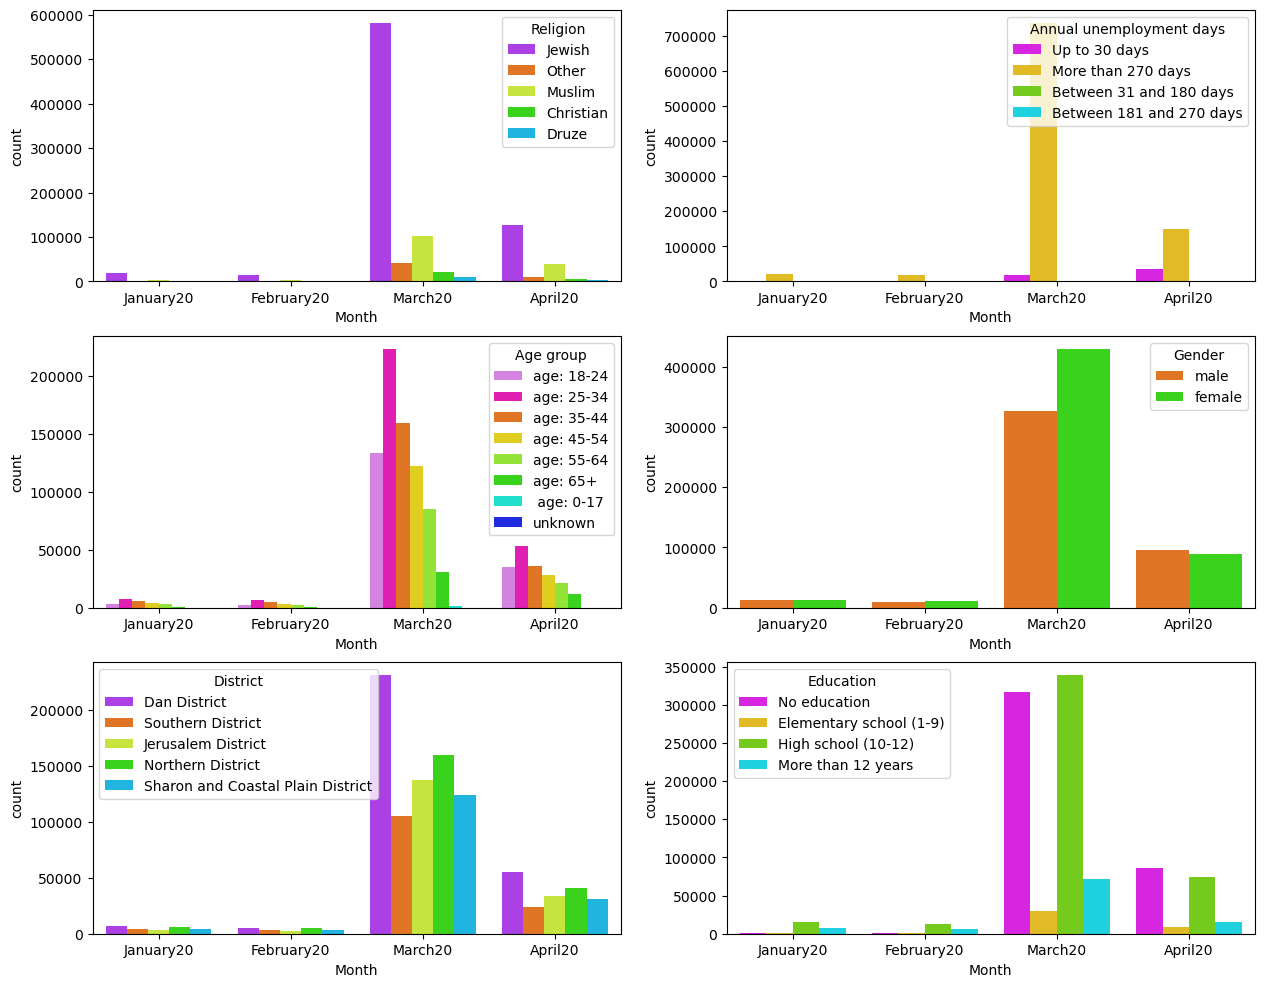

In [14]:
fig, axes = plt.subplots(3,2,figsize=(15,12))
sns.countplot(data = newcomers_df, x = 'Month', ax = axes[0,0], hue = 'Religion', palette = 'gist_ncar_r')
sns.countplot(data = newcomers_df, x = 'Month', ax = axes[0,1], hue = 'Annual unemployment days', palette = 'gist_ncar_r')
sns.countplot(data = newcomers_df, x = 'Month', ax = axes[1,0], hue = 'Age group' ,palette = 'gist_ncar_r')
sns.countplot(data = newcomers_df, x = 'Month', ax = axes[1,1], hue = 'Gender' ,palette = 'gist_ncar_r')
sns.countplot(data = newcomers_df, x = 'Month', ax = axes[2,0], hue = 'District' ,palette = 'gist_ncar_r')
sns.countplot(data = newcomers_df, x = 'Month', ax = axes[2,1], hue = 'Education' ,palette = 'gist_ncar_r')
plt.show()

As observed, there are differences between the various categories regarding the growth of job seekers at the beginning of the COVID-19 pandemic. Let's start investigating.

## Overview of the beginning of Covid-19 in Israel

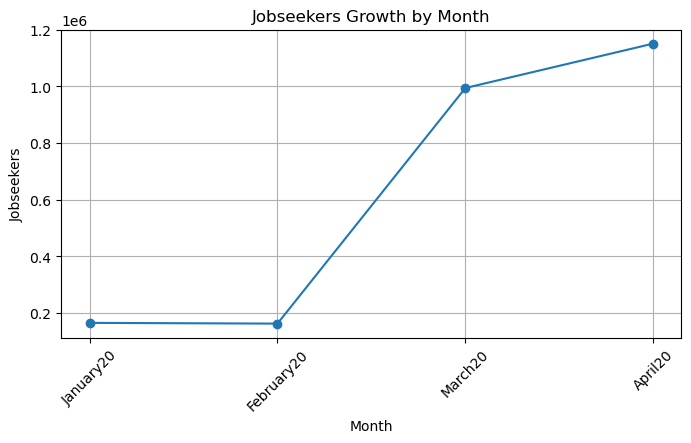

In [15]:
newcomers_data = job_df[['Month', 'Jobseekers']].copy()
month_order = ['January20', 'February20', 'March20', 'April20']
newcomers_data['Month'] = pd.Categorical(newcomers_data['Month'], categories=month_order, ordered=True)

newcomers_monthly = newcomers_data.groupby('Month')['Jobseekers'].sum().reset_index()

plt.figure(figsize=(8, 4))
plt.plot(newcomers_monthly['Month'], newcomers_monthly['Jobseekers'], marker='o')
plt.xlabel('Month')
plt.ylabel('Jobseekers')
plt.title('Jobseekers Growth by Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Guaranteed income

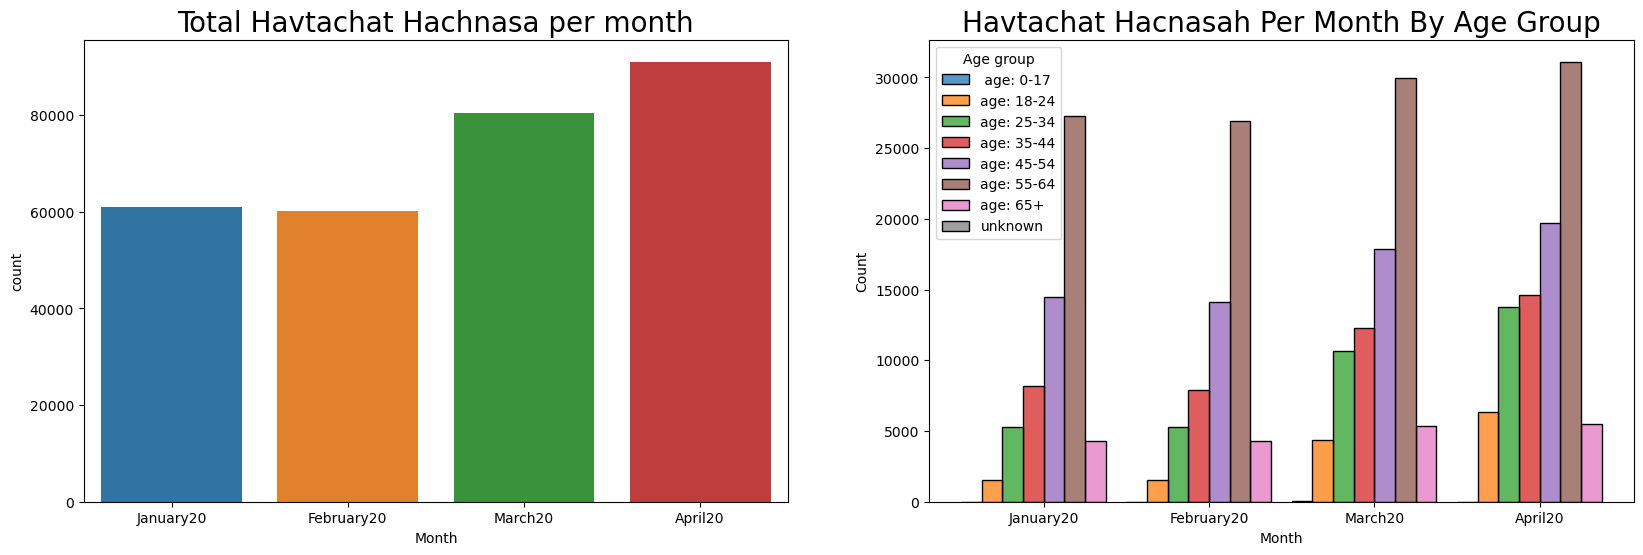

In [16]:
Hh_df=pd.DataFrame(job_df.values.repeat(job_df.Hh, axis=0), columns=job_df.columns)

fig, ax = plt.subplots(1,2,figsize=(20,6))
sns.countplot(data=Hh_df, x="Month", ax=ax[0])
sns.histplot(data=Hh_df, x="Month", hue='Age group',  multiple = 'dodge',hue_order=job_df['Age group'].unique(),ax=ax[1])
ax[0].set_title('Total Havtachat Hachnasa per month', fontsize=20)
ax[1].set_title("Havtachat Hacnasah Per Month By Age Group", fontsize=20)

plt.show()

On the left side, you can see job seekers who are applying for income support each month (they are not unemployed!). There is an increase, but it is not drastic at all. There isn't much change despite the economy being shut down, because these are people who work and simply need additional income.

On the right side, you can see the distribution of income support applicants by age. The largest segment of income support applicants each month are people aged 55-64. It can be assumed that these are individuals who are already tired of working full-time jobs but have not yet reached retirement age, and they turn to the state for assistance.

## Unemployment data by gender

<img src="https://github.com/LirazShushan/Job-Seekers-Covid-19/blob/main/gender.jpeg?raw=true" alt="שעקד" width="600" />

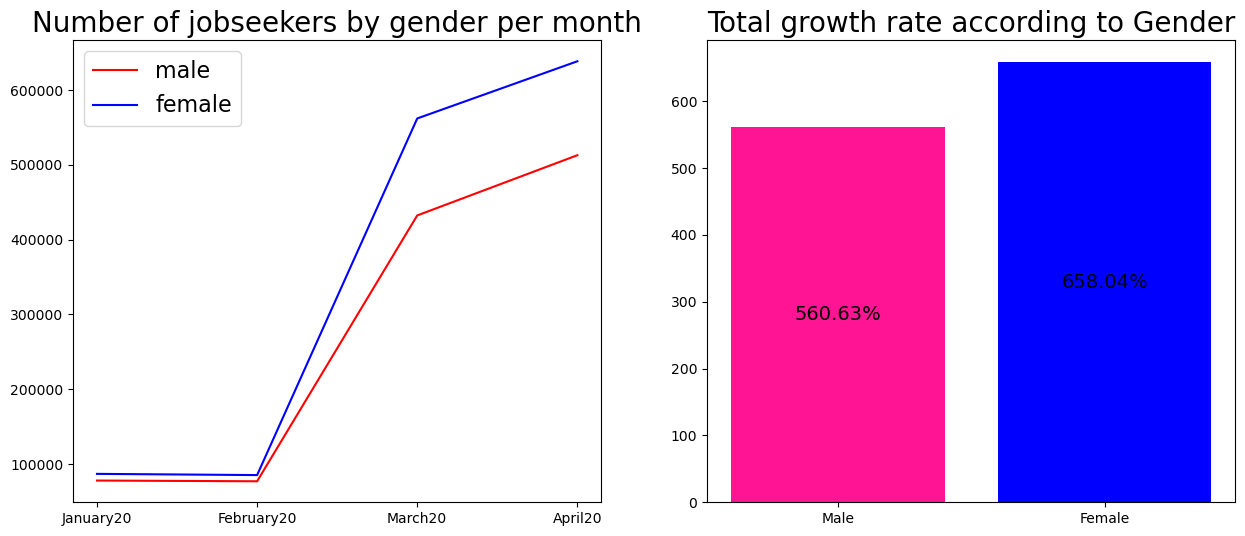

In [17]:
unique_Gender = new_df['Gender'].unique()
colors = ['#FF0000', '#0000FF']  

w3 = new_df[(new_df['Gender'] == 'male') & (new_df['Month'] == 'March20')]
w2 = new_df[(new_df['Gender'] == 'male') & (new_df['Month'] == 'February20')]
q3 = new_df[(new_df['Gender'] == 'female') & (new_df['Month'] == 'March20')]
q2 = new_df[(new_df['Gender'] == 'female') & (new_df['Month'] == 'February20')]

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

for index, gender in enumerate(unique_Gender):
    gender_data = new_df[new_df['Gender'] == gender]['Month'].value_counts().to_frame()
    correct_order = ['January20', 'February20', 'March20', 'April20']
    gender_data = gender_data.reindex(correct_order).rename(columns={'Month': gender})
    gen = sns.lineplot(data=gender_data, palette=[colors[index]], ax=ax[0])
    

m = (len(w3) / len(w2)) * 100
f = (len(q3) / len(q2)) * 100
colors = ['#FF1493', 'blue']
x_labels1 = ['Male', 'Female']
values1 = [m, f]

ax[1].bar(x_labels1, values1, align='center', color=colors)
for i, v in enumerate(values1):
    plt.text(i, v / 2, '{:.2f}%'.format(v), ha='center', va='center', color='black', fontsize=14)

ax[0].set_title('Number of jobseekers by gender per month', fontsize=20)
ax[1].set_title("Total growth rate according to Gender", fontsize=20)

ax[0].legend(fontsize=16)  

plt.show()

It can be observed that the rate of increase (slope) for women is steeper than for men in March. Afterward, the slopes are equal (same rate).

One possible explanation for this is gender discrimination, where more women are being put on unpaid leave compared to men. Another explanation is that since the economy was shut down and children were at home, parents had to decide who would go to work and who would stay with the children. It is possible that households preferred men to continue working and maintain their income, while women were compelled to stay home with the children. The main reason for this is likely the wage gap between men and women and the nature of men's work.

## Unemployment data by age group

<img src="https://github.com/LirazShushan/Job-Seekers-Covid-19/blob/main/ages.jpg?raw=true" alt="שעקד" width="600" />

In [18]:
age = newcomers_df.groupby(['Month'])[['Age group']].value_counts().unstack().rename_axis(None, axis = 1).reset_index()

In [19]:
month_ages = newcomers_df.groupby(['Month', 'Age group']).Gender.count().reset_index().rename(columns={"Gender":"total"})

In [20]:
ages = newcomers_df.groupby('Month').Gender.count().reset_index().rename(columns={'Gender': 'total_month'})

In [21]:
data_month = pd.DataFrame.merge(month_ages, ages, on='Month')

In [22]:
data_month['Prec_from_total'] = round((data_month['total'] / data_month['total_month']) * 100.00, 2)

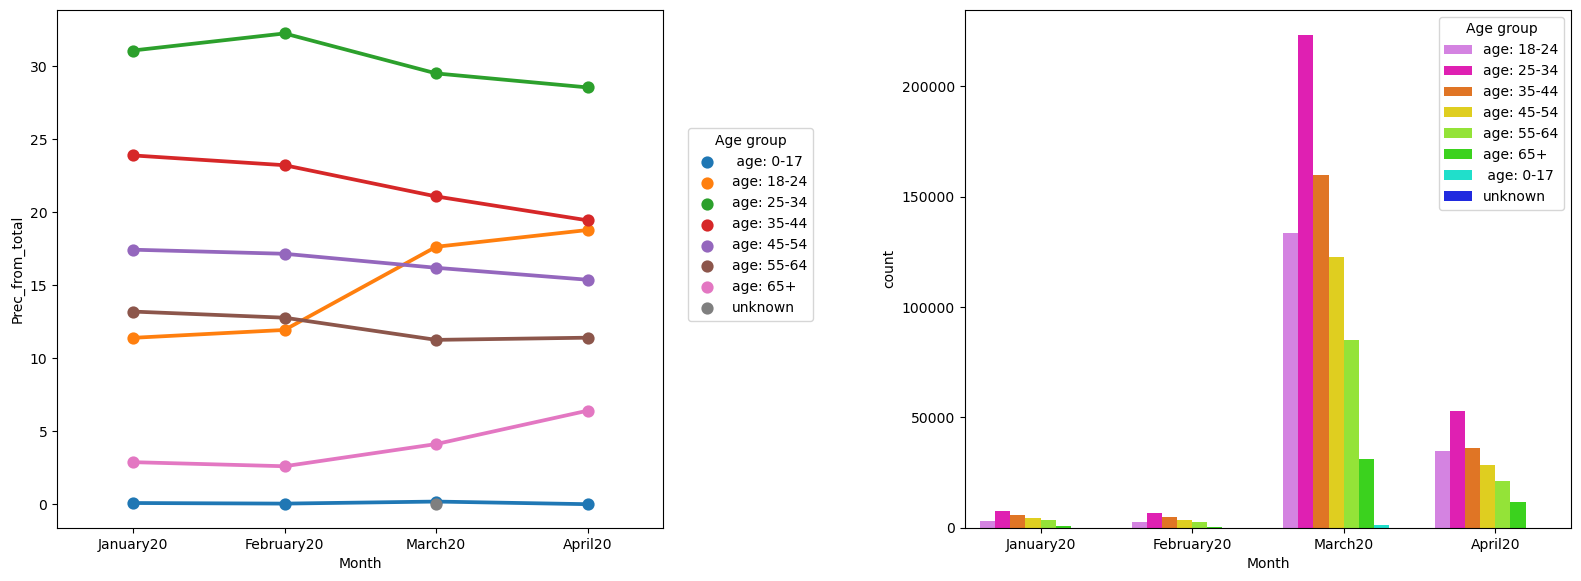

In [33]:
fig, axes = plt.subplots(figsize=(17,7), ncols=2)
c1 = sns.pointplot(data = data_month, x = 'Month', y = 'Prec_from_total', hue = "Age group", order=['January20', 'February20', 'March20', 'April20'], ax = axes[0])
c1.legend(title='Age group', loc=(1.04,0.4))
c2 = sns.countplot(data = newcomers_df, x = 'Month', hue = 'Age group' , ax = axes[1], palette = 'gist_ncar_r')
fig.tight_layout(pad=5.0)
#plt.legend(title='Age_group', loc=(1.04,0.5))
plt.show()

The graphs show that the age group significantly affected is 18-24. This group's percentage of total job seekers increased substantially following the onset of COVID-19. We speculate that this is because this age group typically works in jobs that require little to no training and often have low seniority (recently discharged soldiers, students). For these reasons, they experienced significant hardship when the economy was shut down.

## Unemployment data by academic education

<img src="https://github.com/LirazShushan/Job-Seekers-Covid-19/blob/main/knowlege.jpeg?raw=true" alt="שעקד" width="600" />

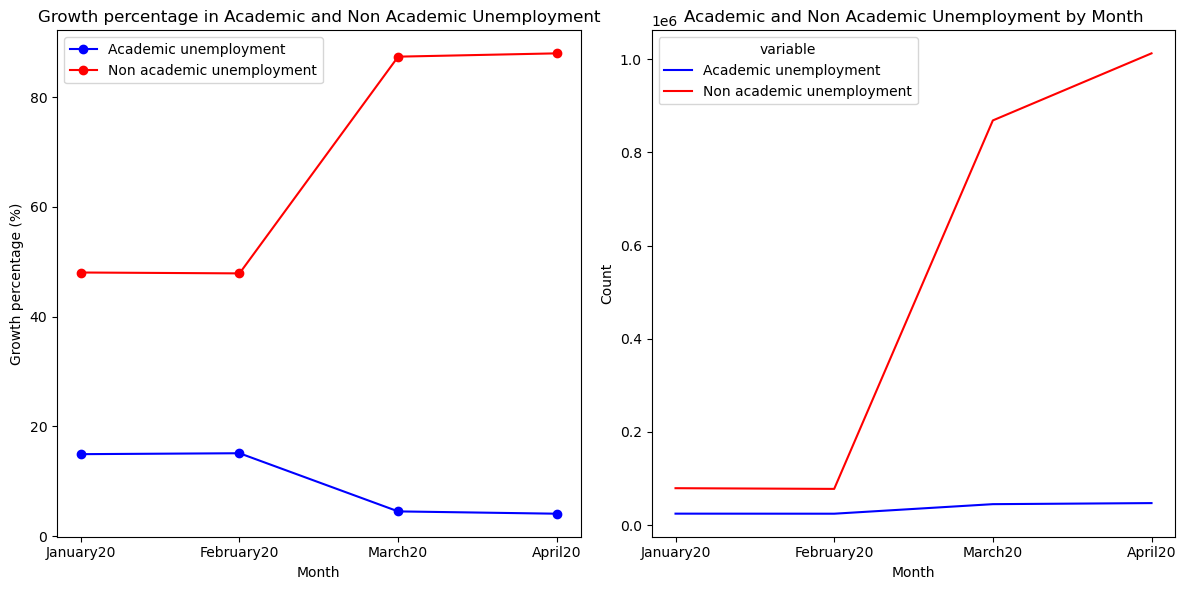

In [35]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
Academic_df = job_df.groupby('Month')['Academic unemployment', 'Non academic unemployment', 'Jobseekers'].sum().reset_index()
month_order = ['January20', 'February20', 'March20', 'April20']
Academic_df['Month'] = pd.Categorical(Academic_df['Month'], categories=month_order, ordered=True)
Academic_df = Academic_df.sort_values('Month')
Academic_df['Academic unemployment'] = Academic_df['Academic unemployment']/Academic_df['Jobseekers']*100
Academic_df['Non academic unemployment'] = Academic_df['Non academic unemployment']/Academic_df['Jobseekers']*100
Academic_df = Academic_df.drop('Jobseekers', axis=1)

features = ['Month', 'Academic unemployment', 'Non academic unemployment']
Academic_df_melted = pd.melt(Academic_df[features], id_vars = 'Month', value_vars = features)

barplot2 = Academic_df[(Academic_df.Month == 'January') | (Academic_df.Month == 'February')]
mean_values = barplot2.loc[:, ['Academic unemployment', 'Non academic unemployment']].mean().reset_index()\
.rename(columns={0: 'Average Percent', 'index': 'Academic Education'})

Academic_df1 = job_df.groupby('Month')['Academic unemployment', 'Non academic unemployment'].sum().reset_index()
month_order = ['January20', 'February20', 'March20', 'April20']
Academic_df1['Month'] = pd.Categorical(Academic_df1['Month'], categories=month_order, ordered=True)
Academic_df1 = Academic_df1.sort_values('Month')

fig, ax = plt.subplots(1, 2, figsize=(12,6))
plt.subplots_adjust(wspace=0.1)
sns.lineplot(data=Academic_df1.melt(id_vars='Month'), x='Month', y='value', hue='variable', ax=ax[1], palette={'Academic unemployment': 'blue', 'Non academic unemployment': 'red'})
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Count')
ax[1].set_title('Academic and Non Academic Unemployment by Month')

colors = ['blue', 'red']
for variable, color in zip(Academic_df_melted['variable'].unique(), colors):
    variable_data = Academic_df_melted[Academic_df_melted['variable'] == variable]
    ax[0].plot(variable_data['Month'], variable_data['value'], marker='o', color=color, label=variable)

ax[0].set_xlabel('Month')
ax[0].set_ylabel('Growth percentage (%)')
ax[0].set_title('Growth percentage in Academic and Non Academic Unemployment')
ax[0].legend()
ax[0].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

It can be seen that during the changes that occurred during the COVID-19 pandemic, which reflect the economy's behavior in a crisis, people without academic education were severely affected. Although we might expect that in such a situation, familiar to all of us, a high percentage of employees with academic education would also be laid off, we can see that, in practice, people without academic education were more severely impacted. As a result, the graph depicting their percentage of total job seekers rises sharply.

### The relationship between age and academic education as a reason for unemployment

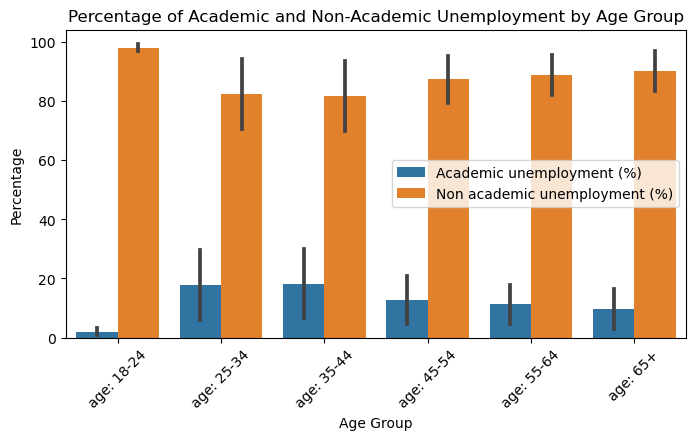

In [49]:
academic_age = job_df[['Age group','Month', 'Academic unemployment', 'Non academic unemployment']]
academic_age = academic_age.groupby(['Age group','Month'])[['Academic unemployment', 'Non academic unemployment']].sum().reset_index()
academic_age['Total'] = academic_age['Academic unemployment'] + academic_age['Non academic unemployment']
academic_age['Academic unemployment (%)'] = academic_age['Academic unemployment'] / academic_age['Total'] * 100
academic_age['Non academic unemployment (%)'] = academic_age['Non academic unemployment'] / academic_age['Total'] * 100

melted_df = pd.melt(academic_age, id_vars='Age group', value_vars=['Academic unemployment (%)', 'Non academic unemployment (%)'],
                    var_name='Unemployment Type', value_name='Percentage')
melted_df = melted_df[~melted_df['Age group'].isin([' age: 0-17', 'unknown'])]

plt.figure(figsize=(8, 4))
sns.barplot(x='Age group', y='Percentage', hue='Unemployment Type', data=melted_df)
plt.title('Percentage of Academic and Non-Academic Unemployment by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend()

It can be seen that the age group 18-24 has the largest gap between unemployed individuals without an academic education and those with an academic education. This disparity could explain the sharp increase in job seekers in this age group following the onset of COVID-19.

## Unemployment data by relegion

In [26]:
population = {'Religion': ['Jewish', 'Muslim', 'Christian', 'Druze'],
                'Population': [6772000, 1669000, 182000, 149000]}
population_df = pd.DataFrame(population)

total_unemployed_by_religion_month = job_df.groupby(['Religion', 'Month'])['Jobseekers'].sum().reset_index()
total_unemployed_by_religion_month = total_unemployed_by_religion_month[total_unemployed_by_religion_month.loc[:,'Religion'] != 'Other']

merged_df = pd.merge(total_unemployed_by_religion_month, population_df, on='Religion')
merged_df['Unemployment_Ratio'] = merged_df['Jobseekers'] / merged_df['Population']*100

months_order = ['January20', 'February20', 'March20', 'April20']
filtered_df = merged_df[merged_df['Month'].isin(months_order)]

filtered_df['Month'] = pd.Categorical(filtered_df['Month'], categories=months_order, ordered=True)
filtered_df.sort_values('Month', inplace=True)

total_unemployed_by_religion_month2 = total_unemployed_by_religion_month[total_unemployed_by_religion_month.loc[:,'Month'] != 'March20']
total_unemployed_by_religion_month2 = total_unemployed_by_religion_month2[total_unemployed_by_religion_month2.loc[:,'Month'] != 'April20']
merged = pd.merge(total_unemployed_by_religion_month2, population_df, on='Religion')
merged['Percent'] = merged['Jobseekers'] / merged['Population']*100

barplot = merged.groupby('Religion')['Percent'].mean().to_frame().reset_index()

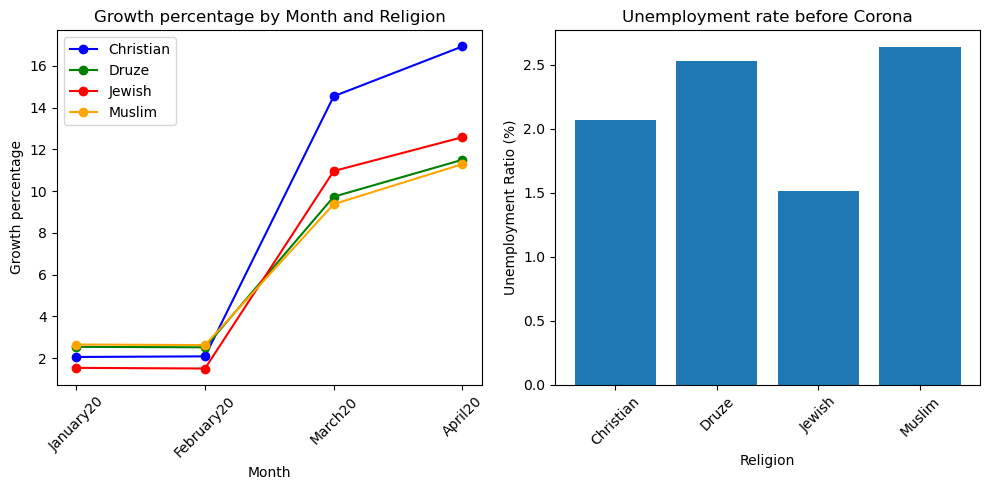

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
plt.subplots_adjust(wspace=0.3)
ax[1].bar(barplot['Religion'], barplot['Percent'])
ax[1].set_xlabel('Religion')
ax[1].set_ylabel('Unemployment Ratio (%)')
ax[1].set_title('Unemployment rate before Corona')
ax[1].tick_params(axis='x', rotation=45)

colors = ['blue', 'green', 'red', 'orange']
for religion, color in zip(filtered_df['Religion'].unique(), colors):
    religion_data = filtered_df[filtered_df['Religion'] == religion]
    ax[0].plot(religion_data['Month'], religion_data['Unemployment_Ratio'], marker='o', color=color, label=religion)

ax[0].set_xlabel('Month')
ax[0].set_ylabel('Growth percentage')
ax[0].set_title('Growth percentage by Month and Religion')
ax[0].legend()
ax[0].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The percentage of the workforce among Christians increased sharply in March by about twice that of the rest of the population, despite higher percentages among the Muslim and Druze populations in the months before the coronavirus. We estimate that the main difference between the Druze and Muslim groups compared to the Christian group lies in the type of jobs they work. It is possible that a higher percentage of Druze and Muslims work in manual labor jobs that were also active during the coronavirus period.

## What happened since the covid-19 ended?

In [6]:
April_23 = pd.read_csv('https://raw.githubusercontent.com/LirazShushan/Job-Seekers-Covid-19/main/April2023.csv')
April_23 = April_23.drop(['עיסוקים עד פברואר 2015','מצטרפים חדשים שפוטרו'], axis=1)
April_23 = April_23.rename(columns={'חודש':'Month', 'מחוז':'District', 'קבוצת גיל':'Age group', 'מין':'Gender', 'שנות לימוד':'Education',\
                         'מוגבלות רפואית':'Disability','דת':'Religion', 'ימי אבטלה שנתיים':'Annual unemployment days',\
                         'עיסוקים החל מאפריל 2015':'Occupations until April 2015','דורשי עבודה':'Jobseekers', 'הבטחת הכנסה':'Hh',\
                         'אבטלה אקדמאים':'Academic unemployment', 'אבטלה לא אקדמאים':'Non academic unemployment','מצטרפים חדשים':'Newcomers' })

April_23['Month'] = April_23['Month'].str.replace('2023-0', '')
April_23['Month'] = April_23['Month'].str.replace('2020-0', '')
April_23['Month'] = April_23['Month'].astype(int)
month_mapping = {1: 'January23',2: 'February23',3: 'March23',4: 'April23',5: 'May',6: 'June',7: 'July',8: 'August',9: 'September',10: 'October',11: 'November',12: 'December'}
education_mapping = {'ג. 10 עד 12': 'High school (10-12)','א. לא למד': 'No education','ד. מעל 12': 'More than 12 years','ב. 1 עד 9': 'Elementary school (1-9)'}
disability_mapping = {'א. ללא מגבלות': 'No disabilities','ג. בינונית': 'Moderate','ב. קלה': 'Mild','ד. קשה': 'Severe'}
religion_mapping = {'יהודים': 'Jewish','מוסלמים': 'Muslim','אחר': 'Other','נוצרים': 'Christian','דרוזים': 'Druze'}
gender_mapping = {'זכר':'male','נקבה':'female'}
unemployment_mapping = {'ד. מעל 270 יום': 'More than 270 days', 'א. עד 30 יום': 'Up to 30 days', 'ב. בין 31 ל-180 יום': 'Between 31 and 180 days', 'ג. בין 181 ל-270 יום': 'Between 181 and 270 days'}
occupation_mapping = {'לא הוגדר': 'Undefined','עובדי מכירות ושירותים': 'Sales and service workers','בעלי משלח יד אקדמי': 'Academic professionals','עובדים בלתי מקצועיים': 'Unskilled workers','הנדסאים, טכנאים, סוכנים ובעלי משלח יד נלווה': 'Engineers, technicians, agents, and related support professionals','מנהלים': 'Managers','בעלי מלאכה בתעשייה ובבינוי ובעלי משלח יד דומה': 'Craft and related trades workers in industry and construction','פקידים כלליים ועובדי משרד': 'General office clerks and office workers','מפעילי מתקנים ומכונות, מרכיבי מוצרים וציוד ונהגים': 'Plant and machine operators, assemblers, drivers','עובדים מקצועיים בחקלאות, בייעור ובדיג': 'Skilled agricultural, forestry, and fishery workers'}
age_mapping = {'בני 45 עד 54': 'age: 45-54','בני 55 עד 64': 'age: 55-64','בני 65 ומעלה': 'age: 65+','בני 17 ומטה': ' age: 0-17','בני 18 עד 24': 'age: 18-24','בני 25 עד 34': 'age: 25-34','בני 35 עד 44': 'age: 35-44','לא ידוע': 'unknown'}
district_mapping = {'מחוז ש"ת דן': 'Dan District','מחוז ש"ת צפון': 'Northern District','מחוז ש"ת ירושלים': 'Jerusalem District','מחוז ש"ת דרום': 'Southern District','מחוז ש"ת שרון ועמקים': 'Sharon and Coastal Plain District'}
April_23['District'] = April_23['District'].map(district_mapping)
April_23['Age group'] = April_23['Age group'].map(age_mapping)
April_23['Gender'] = April_23['Gender'].map(gender_mapping)
April_23['Occupations until April 2015'].value_counts()
April_23['Month'] = April_23['Month'].map(month_mapping)
April_23['Education'] = April_23['Education'].map(education_mapping)
April_23['Disability'] = April_23['Disability'].map(disability_mapping)
April_23['Religion'] = April_23['Religion'].map(religion_mapping)
April_23['Annual unemployment days'] = April_23['Annual unemployment days'].map(unemployment_mapping)
April_23['Occupations until April 2015'] = April_23['Occupations until April 2015'].map(occupation_mapping)

big_df = pd.concat([job_df, April_23], ignore_index=True)

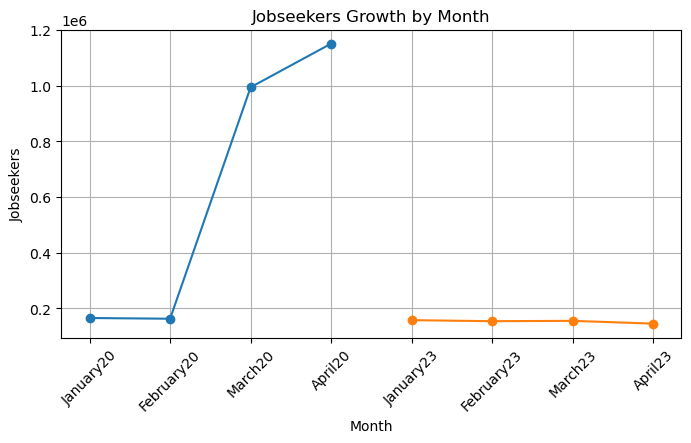

In [29]:
Jobseekers_data = big_df[['Month', 'Jobseekers']].copy()
month_order = ['January20', 'February20', 'March20', 'April20', 'January23', 'February23', 'March23', 'April23']
Jobseekers_data['Month'] = pd.Categorical(Jobseekers_data['Month'], categories=month_order, ordered=True)
Jobseekers_monthly = Jobseekers_data.groupby('Month')['Jobseekers'].sum().reset_index()

plt.figure(figsize=(8, 4))
segment1 = Jobseekers_monthly.loc[Jobseekers_monthly['Month'] <= 'April20']
segment2 = Jobseekers_monthly.loc[Jobseekers_monthly['Month'] >= 'January23']
plt.plot(segment1['Month'], segment1['Jobseekers'], marker='o')
plt.plot(segment2['Month'], segment2['Jobseekers'], marker='o')
plt.xlabel('Month')
plt.ylabel('Jobseekers')
plt.title('Jobseekers Growth by Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

This graph also depicts the trend over the four months from January to April 2023. It shows that the economy recovered.

<img src="https://github.com/LirazShushan/Job-Seekers-Covid-19/blob/main/mask.jpeg?raw=true" alt="שעקד" width="700" />
